In [1]:
import rebound, os
print(rebound.__build__)
import numpy as np
import warnings,glob
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    %matplotlib inline
    import matplotlib.pyplot as plt

Jan 28 2017 16:38:55


In [44]:
if not os.path.isfile("janus_init.bin"):
    sim = rebound.Simulation()
    sim.add(["Sun","Mercury","Venus","Earth","Mars","Jupiter","Saturn","Uranus","Neptune"])
    sim.save("janus_init.bin")
sim = rebound.Simulation.from_file("janus_init.bin")
sim.move_to_com()
sim.integrator = "janus"
sim.ri_janus.integrator = 1
sim.ri_janus.scale = 1e20
sim.dt = 2.5/365.25*2.*np.pi
#sim.getWidget()

In [45]:
N = 100
times = np.logspace(-1,5,N)
E0 = sim.calculate_energy()
energy = np.zeros((N))

In [46]:
for i,t in enumerate(times):
    sim.integrate(t,exact_finish_time=0)
    energy[i] = np.abs((sim.calculate_energy()-E0)/E0)

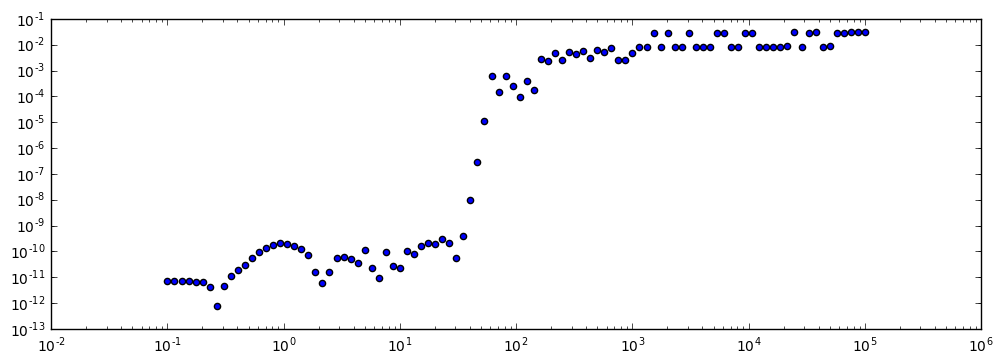

In [47]:
fig = plt.figure(figsize=(12, 4)) 
ax = plt.subplot(111)
ax.set_xscale("log")
ax.set_yscale("log")
ax.scatter(times, energy);